# Model with Approach 1:

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_recall_curve, roc_auc_score, roc_curve
import numpy as np

In [2]:
model_df = pd.read_csv("normal.csv")
model_df.head()

,hypertension,heart_disease,diabetes,gender,smoking_history_No Info,smoking_history_current,smoking_history_not current,age,bmi,HbA1c_level,blood_glucose_level
0,0,1,0,0,0.0,0.0,1.0,1.000000,-0.645658,0.127273,-0.454545
1,0,0,0,0,1.0,0.0,0.0,0.349349,-0.595938,0.127273,-1.000000
2,0,0,0,1,0.0,0.0,1.0,-0.301301,-0.595938,-0.200000,-0.290909
3,0,0,0,0,0.0,1.0,0.0,-0.101101,-0.686275,-0.454545,-0.318182
4,1,1,0,1,0.0,1.0,0.0,0.899900,-0.763539,-0.527273,-0.318182


In [3]:
# Define features (X) and target (y)
X = model_df.drop(["diabetes"] ,axis=1)
y = model_df["diabetes"]

In [4]:
# Split dataset into train and test sets (stratified to preserve class balance)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.10, random_state=42, stratify=y
)
X_train.shape,X_test.shape

((89983, 10), (9999, 10))

In [5]:
# Encode target labels using OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, drop=None)
y_train_encoded = encoder.fit_transform(y_train.to_frame())
y_test_encoded = encoder.transform(y_test.to_frame())
y_train_encoded, y_test_encoded

(array([[1., 0.],
        [1., 0.],
        [1., 0.],
        ...,
        [1., 0.],
        [1., 0.],
        [1., 0.]]),
 array([[1., 0.],
        [1., 0.],
        [1., 0.],
        ...,
        [1., 0.],
        [1., 0.],
        [1., 0.]]))

In [6]:
len(y_train_encoded), len(y_test_encoded),len(X_train), len(X_test)

(89983, 9999, 89983, 9999)

In [7]:
# Build a neural network model 
model = Sequential()
model.add(Dense(128, input_shape=(X_train.shape[1],), activation='tanh'))
model.add(Dense(64, activation='tanh'))
model.add(Dense(32, activation='tanh'))
model.add(Dense(2, activation='softmax'))

# Compile the model with categorical crossentropy loss and Adam optimizer
model.compile(loss='categorical_crossentropy', optimizer="Adam", metrics=['accuracy',"recall"])
model.summary()

# Train the model with early stopping to prevent overfitting
h = model.fit(
    X_train, y_train_encoded,
    epochs=150,
    batch_size=64,
    callbacks = EarlyStopping(monitor='val_loss', patience=15),             
    validation_data=(X_test, y_test_encoded)
)


/Users/durudemirbag/miniforge3/envs/tf/lib/python3.9/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-08-19 20:25:31.391349: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2
2025-08-19 20:25:31.391495: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2025-08-19 20:25:31.391501: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2025-08-19 20:25:31.392059: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-08-19 20:25:31.392068: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:27

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         1,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 2)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,810 (46.13 KB)

 Trainable params: 11,810 (46.13 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/150


2025-08-19 20:25:31.867891: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


1406/1406 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.9529 - loss: 0.1345 - recall: 0.9529 - val_accuracy: 0.9630 - val_loss: 0.1108 - val_recall: 0.9630
Epoch 2/150
1406/1406 ━━━━━━━━━━━━━━━━━━━━ 17s 12ms/step - accuracy: 0.9617 - loss: 0.1105 - recall: 0.9617 - val_accuracy: 0.9673 - val_loss: 0.1015 - val_recall: 0.9673
Epoch 3/150
1406/1406 ━━━━━━━━━━━━━━━━━━━━ 18s 13ms/step - accuracy: 0.9681 - loss: 0.0988 - recall: 0.9681 - val_accuracy: 0.9711 - val_loss: 0.0875 - val_recall: 0.9711
Epoch 4/150
1406/1406 ━━━━━━━━━━━━━━━━━━━━ 18s 13ms/step - accuracy: 0.9709 - loss: 0.0864 - recall: 0.9709 - val_accuracy: 0.9727 - val_loss: 0.0836 - val_recall: 0.9727
Epoch 5/150
1406/1406 ━━━━━━━━━━━━━━━━━━━━ 18s 13ms/step - accuracy: 0.9712 - loss: 0.0839 - recall: 0.9712 - val_accuracy: 0.9704 - val_loss: 0.0857 - val_recall: 0.9704
Epoch 6/150
1406/1406 ━━━━━━━━━━━━━━━━━━━━ 18s 13ms/step - accuracy: 0.9712 - loss: 0.0849 - recall: 0.9712 - val_accuracy: 0.9629 - val_loss: 0.1043 - val_r

In [8]:
# Plot training vs validation accuracy and loss across epochs
def LossHistory (history):
    # Accuracy 
    plt.figure(figsize=(8,4))
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Accuracy per Epoch')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Loss 
    plt.figure(figsize=(8,4))
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Loss per Epoch')
    plt.legend()
    plt.grid(True)
    plt.show()

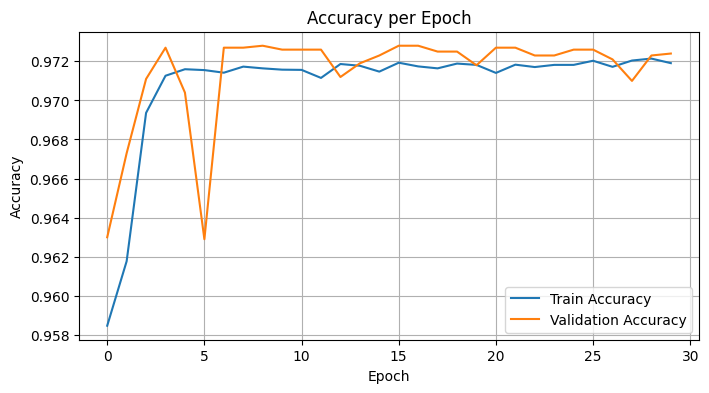

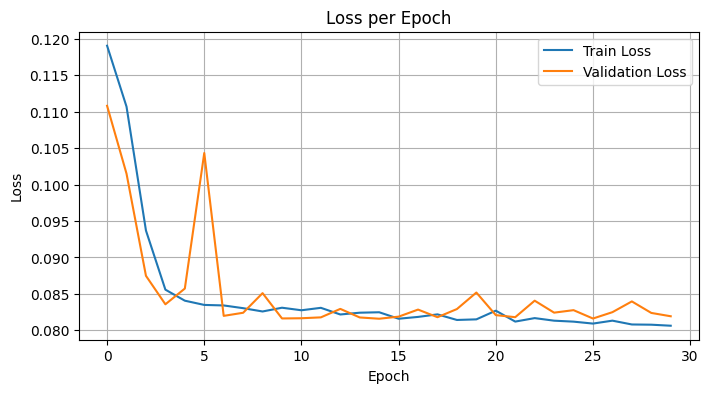

In [9]:
LossHistory(h)

In [10]:
# Evaluate model performance on train set
y_pred_prob_train = model.predict(X_train)
y_pred_train = (y_pred_prob_train > 0.5).astype(int)

print(classification_report(y_train_encoded, y_pred_train))

2812/2812 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
              precision    recall  f1-score   support

           0       0.97      1.00      0.99     82333
           1       0.99      0.68      0.81      7650

   micro avg       0.97      0.97      0.97     89983
   macro avg       0.98      0.84      0.90     89983
weighted avg       0.97      0.97      0.97     89983
 samples avg       0.97      0.97      0.97     89983



In [11]:
train_accuracy=accuracy_score(y_train_encoded, y_pred_train)
print("Train accuracy:" , train_accuracy)

Train accuracy: 0.9722058611070981


In [12]:
# Evaluate model performance on test set
y_pred_prob_test = model.predict(X_test)
y_pred_test = (y_pred_prob_test > 0.5).astype(int)

print(classification_report(y_test_encoded, y_pred_test))

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
              precision    recall  f1-score   support

           0       0.97      1.00      0.99      9149
           1       0.99      0.68      0.81       850

   micro avg       0.97      0.97      0.97      9999
   macro avg       0.98      0.84      0.90      9999
weighted avg       0.97      0.97      0.97      9999
 samples avg       0.97      0.97      0.97      9999



In [13]:
test_accuracy=accuracy_score(y_test_encoded, y_pred_test)
print("Test accuracy:" , test_accuracy)

Test accuracy: 0.9723972397239724



Feature Importance:
                       feature  importance
8                  HbA1c_level    0.063206
9          blood_glucose_level    0.041704
5  smoking_history_not current    0.008101
3      smoking_history_No Info    0.005401
4      smoking_history_current    0.003100
1                heart_disease    0.000400
0                 hypertension    0.000200
2                       gender    0.000000
6                          age    0.000000
7                          bmi    0.000000


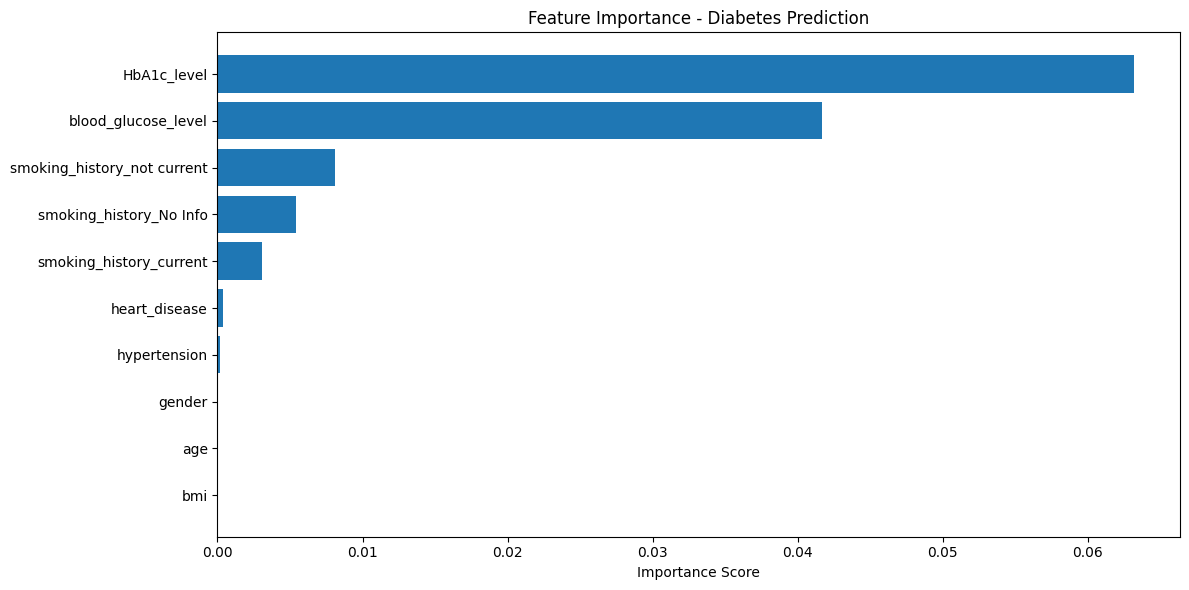

In [14]:
# Display feature importance for diabetes prediction
def feature_importance(model, X_test, y_test):
    if isinstance(X_test, pd.DataFrame):
        X_array = X_test.values
    else:
        X_array = np.array(X_test)
    
    if len(y_test.shape) > 1 and y_test.shape[1] > 1:
        y_true = y_test.argmax(axis=1)
    else:
        y_true = np.array(y_test).ravel()
    
    baseline_pred = model.predict(X_array, verbose=0)
    if baseline_pred.shape[1] > 1:
        baseline_pred = baseline_pred.argmax(axis=1)
    else:
        baseline_pred = (baseline_pred > 0.5).astype(int).ravel()
    
    baseline = accuracy_score(y_true, baseline_pred)
 
    
    importances = []
    for i in range(X_array.shape[1]):
        X_shuffled = X_array.copy()
        np.random.shuffle(X_shuffled[:, i])
        
        new_pred = model.predict(X_shuffled, verbose=0)
        if new_pred.shape[1] > 1:
            new_pred = new_pred.argmax(axis=1)
        else:
            new_pred = (new_pred > 0.5).astype(int).ravel()
            
        new_score = accuracy_score(y_true, new_pred)
        importances.append(baseline - new_score)
    
    return np.array(importances)


importances = feature_importance(model, X_test, y_test)


feature_names = ['hypertension', 'heart_disease', 'gender', 'smoking_history_No Info',
                'smoking_history_current', 'smoking_history_not current', 
                'age', 'bmi', 'HbA1c_level', 'blood_glucose_level']


results = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
}).sort_values('importance', ascending=False)

print("\nFeature Importance:")
print(results)


plt.figure(figsize=(12, 6))
plt.barh(results['feature'], results['importance'])
plt.xlabel('Importance Score')
plt.title('Feature Importance - Diabetes Prediction')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()